# Polynomial Regression

This method deals with models where the dependent variable is assumed to obey a *linear polynomial* relationship with the dependent variables,

\begin{equation}
    y = b_0 + b_1 x_1 + b_2 x_1^2 + \ldots + b_n x_1^n.
\end{equation}

Note that here *linear* refers to the relationship between the coefficients $b_i$. It is there
Linear polynomial regression is useful in modelling disease spread and numerous other systems.

In this case study, a new employee is being hired at our company, who claims he was paid 160k at his last job, halfway between levels 6 and 7.

We're in the HR team and are trying to work out if he's telling the truth or bluffing. We manage to get hold of the salary data for the levels at his last company How does his claim fit in with the salary data for his previous company?

Let's build a bluffing detector using polynomial regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


We want `X` to be a matrix of features, even though it's single columned. Remember that the upper limit in `1:2` is not included. As we only have 10 entries, we don't have enough data to split in to a training and test set. Also, the library we're using takes care of feature scaling.

In [2]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

## Fitting the Linear Regression to the dataset

As a reference model, we will first fit the data with a linear model.

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Fitting the Polynomial Regression to the dataset

We transform `X` to include polynomial terms to $n=2$ power.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree = 2) 
X_poly = poly_reg_2.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Note that the column of ones for $x^0$ was added automatically.

In [5]:
poly_reg_2.fit(X_poly, y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [6]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Visualising the Linear Regression results

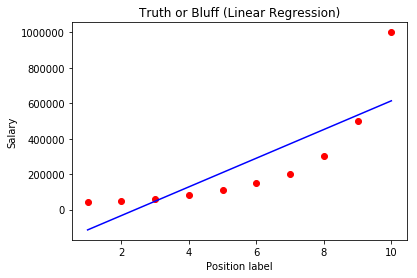

In [7]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

Data is in red, prediction in blue. Note the predictions are not very good.

## Visualising the Polynomial Regression results

Naively you might expect to only need `lin_reg_2.predict(X)` for the predictions, but this will not know about the polynomial features. To ensure our code is robust for new `X`, we'll not use `X_poly` directly, but the code that created it.

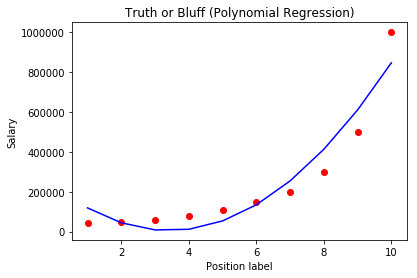

In [9]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg_2.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

We see the new prediction line approaches much better the data, but we can do better. Let's try $n = 3$.

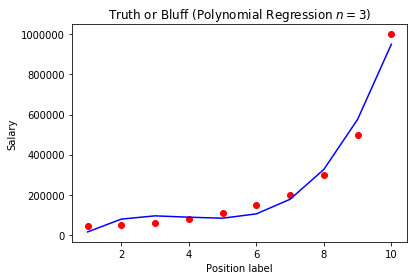

In [10]:
poly_reg_3 = PolynomialFeatures(degree = 3) 
lin_reg_3 = LinearRegression()
lin_reg_3.fit(poly_reg_3.fit_transform(X), y)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_3.predict(poly_reg_3.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression $n = 3$)')
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

Now try $n = 4$.

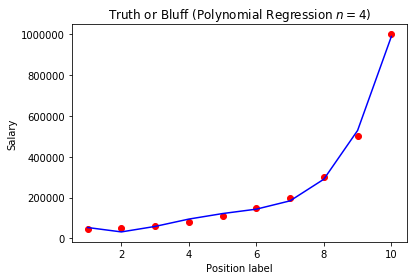

In [11]:
poly_reg_4 = PolynomialFeatures(degree = 4) 
lin_reg_4 = LinearRegression()
lin_reg_4.fit(poly_reg_4.fit_transform(X), y)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_4.predict(poly_reg_4.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression $n = 4$)')
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

Let’s produce a smoother prediction line by looking at finer increments in $X$ for the predictions.

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)

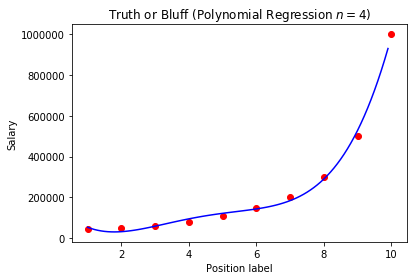

In [12]:
X_grid = X_grid.reshape((len(X_grid), 1))
poly_reg = PolynomialFeatures(degree = 4) 
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(poly_reg.fit_transform(X), y)
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_poly.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression $n = 4$)')
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [16]:
# lin_reg.predict(6.5)
# this doesn't work with Jupyter, 
# where the input type must of the same type as X
# so, lets create a NumPy array with a single value
# and reshape to a scalar
x_to_pred = np.array(6.5).reshape(1,-1)
lin_reg.predict(x_to_pred)

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [17]:
lin_reg_poly.predict(poly_reg.fit_transform(x_to_pred))

array([158862.45265153])

So, the predicted salary for someone halfway between levels 6 and 7 is £159k; the employee appears to have been honest!